In [1]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
from datasets import load_dataset
from PIL import Image

2023-11-15 13:23:57.709691: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 13:23:57.709726: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 13:23:57.712283: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

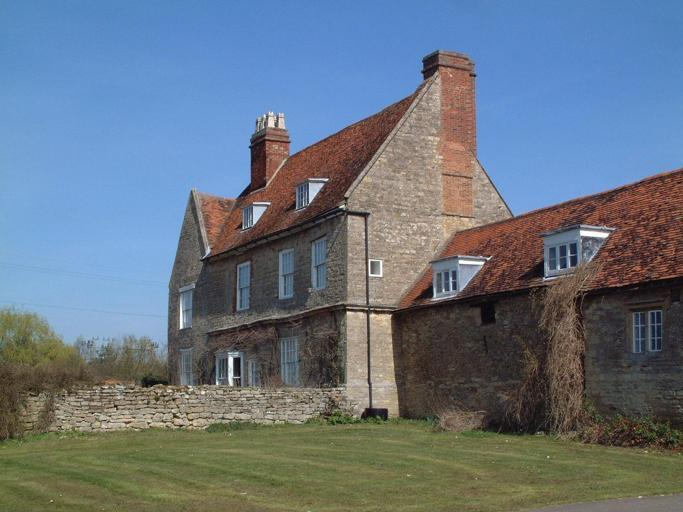

In [2]:
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])
image

In [3]:
beit_feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
beit = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
sf_image_processor= SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
sf_model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

/home/server/.local/lib/python3.10/site-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(


/home/server/.local/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [4]:
inputs = beit_feature_extractor(images=image, return_tensors="pt")
outputs = beit(**inputs)
logits = outputs.logits
pixel_values = inputs["pixel_values"]
outputs = beit.beit(pixel_values)

In [5]:
outputs[0].shape

torch.Size([1, 1601, 768])

In [6]:
inputs = sf_image_processor(images=image, return_tensors="pt")
outputs = sf_model(**inputs)
logits = outputs.logits
pixel_values = inputs["pixel_values"]
outputs = sf_model.segformer.encoder(pixel_values)

In [7]:
outputs[0].shape

torch.Size([1, 256, 16, 16])

In [ ]:
sf_model.segformer.encoder.forward

In [18]:
z = sf_model.segformer.encoder(pixel_values,output_hidden_states=True)

In [22]:
[z[1][i].shape for i in range(4)]

[torch.Size([1, 32, 128, 128]),
 torch.Size([1, 64, 64, 64]),
 torch.Size([1, 160, 32, 32]),
 torch.Size([1, 256, 16, 16])]

In [23]:
import matplotlib.pyplot as plt

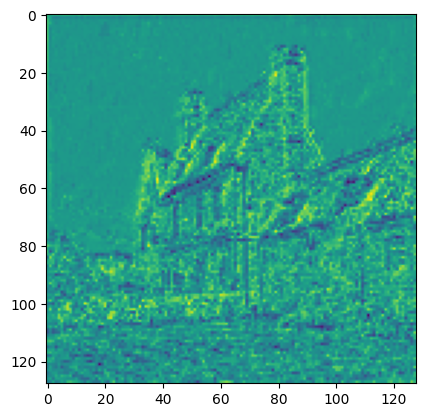

In [29]:
plt.imshow(z[1][0][0,0,:,:].detach())

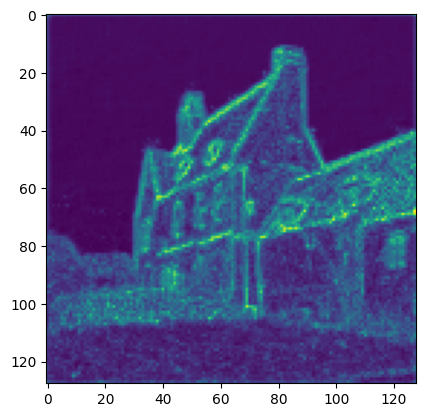

In [30]:
plt.imshow(z[1][0][0,1,:,:].detach())

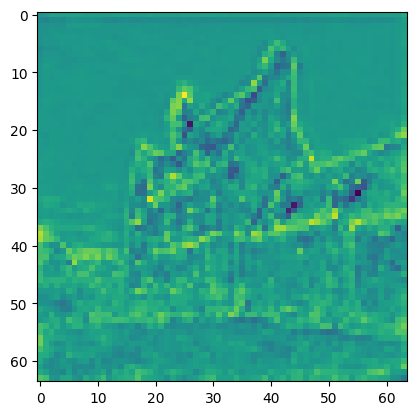

In [31]:
plt.imshow(z[1][1][0,0,:,:].detach())

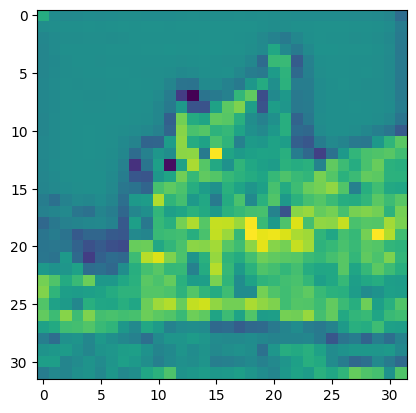

In [35]:
plt.imshow(z[1][2][0,0,:,:].detach())

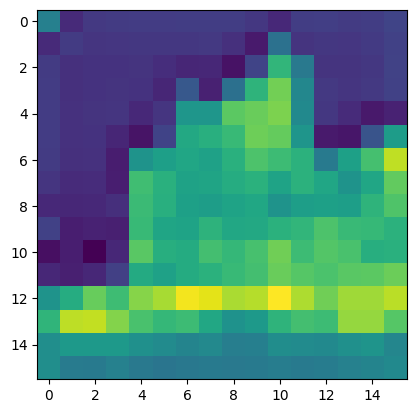

In [36]:
plt.imshow(z[1][3][0,0,:,:].detach())